Model: Linear Regression
Root Mean Squared Error (RMSE): 2987.7938691881886
R-squared: 0.8869209839416881
--------------------


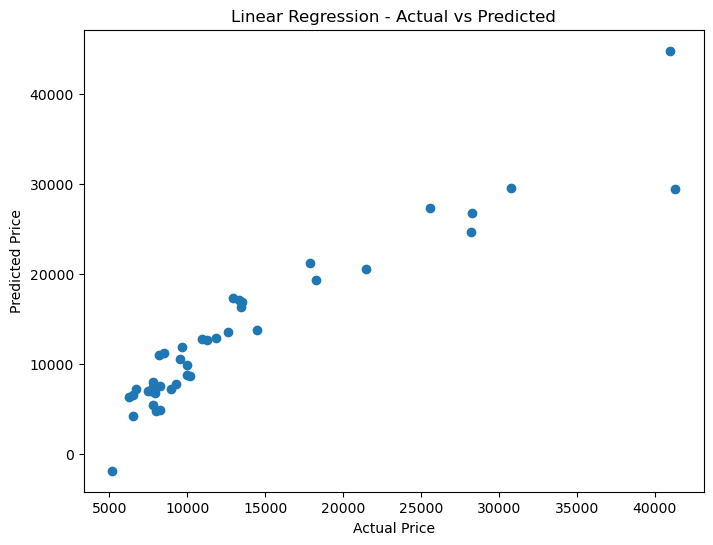

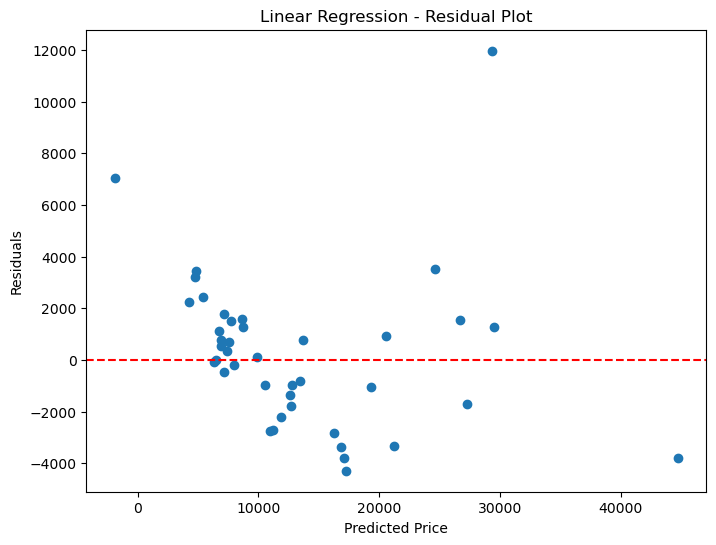

Model: Decision Tree
Root Mean Squared Error (RMSE): 2828.42527464333
R-squared: 0.8986625023010117
--------------------


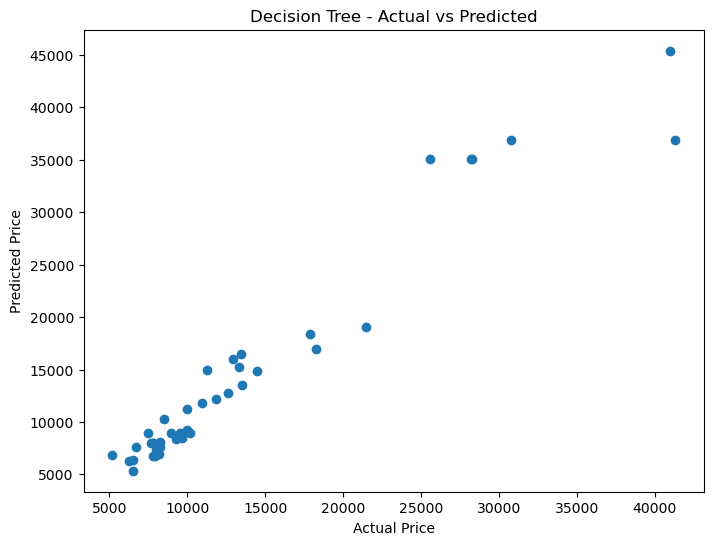

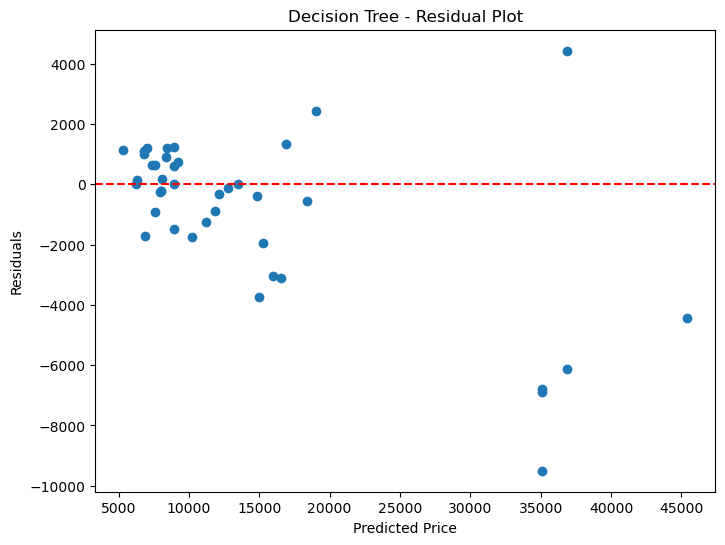

Model: Random Forest
Root Mean Squared Error (RMSE): 1800.1630259408978
R-squared: 0.9589508251054929
--------------------


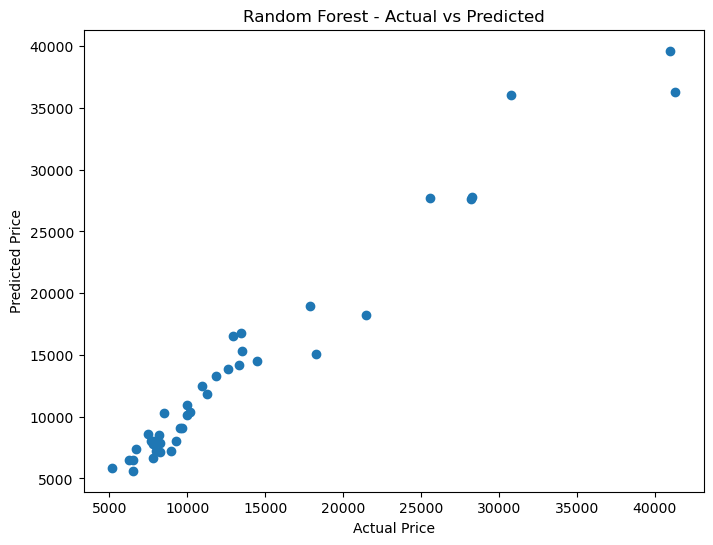

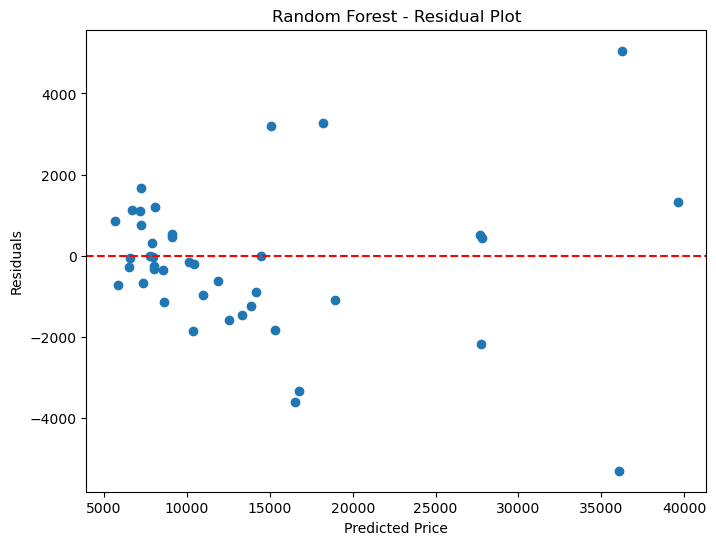

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual file path)
try:
    data = pd.read_csv(r"D:\Car Modeling prediction\CarPrice_Assignment.csv")  # Assuming your data is here
except FileNotFoundError:
    print("Error: File not found. Please check the file path and try again.")
    exit()

# Data Cleaning (Handle missing values and outliers)
# ... (Implement your data cleaning logic here)

# Feature Engineering
data['horsepower_to_weight_ratio'] = data['horsepower'] / data['curbweight']
data['fuel_efficiency_ratio'] = data['highwaympg'] / data['citympg']

# Define features and target
X = data.drop("price", axis=1)
y = data["price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['symboling', 'wheelbase', 'carlength', 'carwidth',
                   'carheight', 'curbweight', 'enginesize', 'boreratio',
                   'stroke', 'compressionratio', 'horsepower', 'peakrpm',
                   'citympg', 'highwaympg', 'horsepower_to_weight_ratio',
                   'fuel_efficiency_ratio']
categorical_features = ['fueltype', 'aspiration', 'doornumber', 'carbody',
                       'drivewheel', 'enginelocation', 'enginetype',
                       'cylindernumber', 'fuelsystem']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Calculate evaluation metrics 
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared: {r2}")
    print("-" * 20)

    # Visualize results (optional)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.show()

    plt.figure(figsize=(8, 6))
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted Price")
    plt.ylabel("Residuals")
    plt.title(f"{model_name} - Residual Plot")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

